# The more login frequency appears, the more risk incident occur?

## 1. Date Preprocessing

In [3]:
import pandas as pd

login_frequency = pd.read_csv("login_frequency.csv")
risk_incident = pd.read_csv("risk_incident.csv")

In [4]:
login_incident = pd.merge(login_frequency, risk_incident, on = "Transaction_ID")
login_incident = login_incident.set_index("Transaction_ID")
login_incident.head()
login_incident.describe()

,Login_Frequency,Risk_Incident
count,10000.000000,10000.000000
mean,5.494700,0.144800
std,2.870783,0.351917
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,8.000000,0.000000
max,10.000000,1.000000


## 2. Correlation (negative correlation)

In [5]:
corr = login_incident.corr(numeric_only = True)
print(corr) # negative correlation

                 Login_Frequency  Risk_Incident
Login_Frequency         1.000000      -0.023592
Risk_Incident          -0.023592       1.000000


## 3. Box Graph

In [6]:
incident_summary2 = login_incident.groupby("Login_Frequency")["Risk_Incident"].agg(
    Risk_count = "sum",
    Total = "count",
    Risk_Rate = "mean"
).reset_index()

print(incident_summary2)

   Login_Frequency  Risk_count  Total  Risk_Rate
0                1         144    980   0.146939
1                2         174   1046   0.166348
2                3         166    972   0.170782
3                4         158   1001   0.157842
4                5         132   1005   0.131343
5                6         113   1010   0.111881
6                7         147   1020   0.144118
7                8         139   1000   0.139000
8                9         133    930   0.143011
9               10         142   1036   0.137066


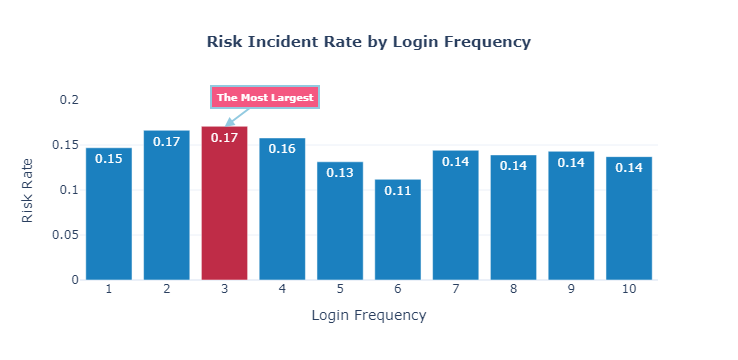

In [15]:
import plotly.graph_objects as go
colors = ['#1B80BF'] * len(incident_summary2["Login_Frequency"])
index = 2 # 제일 많은 2번째만 다른 색상
colors[index] = '#BF2C47' # 색깔로 포인트
    
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = incident_summary2["Login_Frequency"],
        y = incident_summary2["Risk_Rate"],

        text=incident_summary2["Risk_Rate"],
        textposition="auto",
        texttemplate="%{text:.2f}",
        marker_color=colors
    )
)

fig.update_layout(
    {
        "title" : {
            "text" : "<b>Risk Incident Rate by Login Frequency<b>",
            "x" : 0.5,
            "y" : 0.9,
            "font":{
                "size":15
            }
        },
        "xaxis": {
            "title": "Login Frequency",  # x축 제목 
            "showticklabels": True,                  # x축 눈금 라벨을 표시
            "dtick":"1",
            "tickfont": {
                "size": 12  # x축 눈금 라벨의 글꼴 크기를 7로 지정
            }
        },
        "yaxis": {
            "title": "Risk Rate",  # y축 제목 
            "range": [0, 0.2]
        },
        "template": 'plotly_white'  # 그래프 전체의 템플릿을 'plotly_white' (흰색 배경)로 설정
    }
)

# 특정 데이터 포인트에 주석(Annotation) 추가
fig.add_annotation(
    x="3",                        # 주석의 x좌표: Q4
    y=0.17,                                # 주석의 y좌표: 
    text="<b>The Most Largest</b>",      # 주석에 표시할 텍스트 (굵게 표시)
    showarrow=True,                        # 주석에 화살표를 표시하도록 설정
    font=dict(
        size=10,                           # 주석 텍스트의 글꼴 크기를 10으로 지정
        color="#ffffff"                    # 주석 텍스트의 색상을 흰색(#ffffff)으로 지정
    ),
    align="center",                        # 주석 텍스트를 중앙 정렬
    arrowhead=2,                           # 화살표 머리의 스타일을 2번으로 설정
    arrowsize=1,                           # 화살표의 크기를 1로 설정
    arrowwidth=2,                          # 화살표 선의 두께를 2로 설정
    arrowcolor="#77BDD9",                  # 화살표의 색상을 지정
    ax=40,                                 # 화살표 꼬리의 x축 오프셋(픽셀 단위)
    ay=-30,                                # 화살표 꼬리의 y축 오프셋(픽셀 단위)
    bordercolor="#77BDD9",                  # 주석 상자의 테두리 색상을 지정
    borderwidth=2,                         # 주석 상자의 테두리 두께를 2로 설정
    borderpad=4,                           # 주석 상자 내부의 패딩(여백)을 4로 설정
    bgcolor="#F22E62",                     # 주석 상자의 배경색을 지정
    opacity=0.8                            # 주석 상자의 불투명도를 0.8로 설정 (약간 투명)
)

# 최종 그래프를 화면에 표시
fig.show()
            
        
    
    
